In [10]:
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

(60000, 784)



Starting a Restricted Boltzmann Machine with 500 units..

Number of hidden units: 500


100%|██████████| 3000/3000 [00:18<00:00, 161.04it/s]


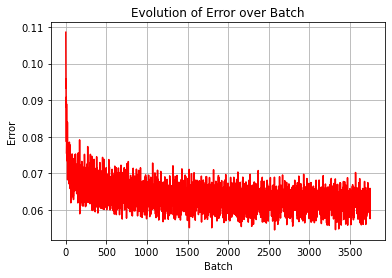

In [11]:

''' restricted boltzmann machine with 500 units'''
print("\nStarting a Restricted Boltzmann Machine with 500 units..")
#
 # Iterating over the epochs
averages_loss = []
mean_averages_loss = [] 
nb_hidden_units = 500
print("\nNumber of hidden units: " + str(nb_hidden_units))
rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                ndim_hidden=nb_hidden_units,
                                is_bottom=False,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=20
                                )
averages_loss_500_units = rbm.cd1(visible_trainset=train_imgs, n_iterations=ITERATIONS, plotting=PLOTTING)



Starting a Restricted Boltzmann Machine with 200 units..

Number of hidden units: 200


100%|██████████| 3000/3000 [00:09<00:00, 308.41it/s]


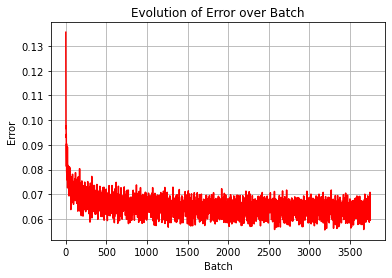

In [12]:

''' restricted boltzmann machine with 200 units'''
print("\nStarting a Restricted Boltzmann Machine with 200 units..")
#
 # Iterating over the epochs
averages_loss_200 = []
nb_hidden_units = 200
print("\nNumber of hidden units: " + str(nb_hidden_units))
rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                ndim_hidden=nb_hidden_units,
                                is_bottom=True,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=20
                                )
averages_loss_200_units = rbm.cd1(visible_trainset=train_imgs, n_iterations=ITERATIONS, plotting=PLOTTING)

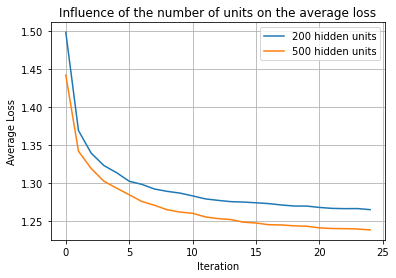

In [13]:
if PLOTTING:
    plt.plot(np.arange(len(averages_loss_200_units)), averages_loss_200_units, label=str(200) + " hidden units")
    plt.plot(np.arange(len(averages_loss_500_units)), averages_loss_500_units, label=str(500) + " hidden units")
    plt.xlabel("Iteration")
    plt.ylabel("Average Loss")
    plt.title("Influence of the number of units on the average loss")
    plt.grid()
    plt.legend()
    plt.show()

(60000, 784)

Starting a Deep Belief Net..
training vis--hid


100%|██████████| 3000/3000 [00:12<00:00, 232.71it/s]


training hid--pen


100%|██████████| 3000/3000 [00:08<00:00, 346.67it/s]


training pen+lbl--top


100%|██████████| 3000/3000 [00:41<00:00, 71.57it/s]


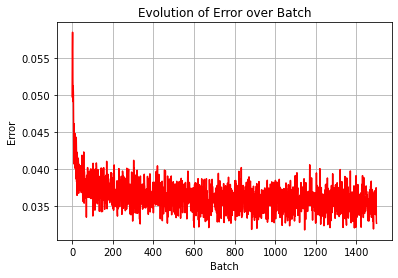

Recognition with the train set

 accuracy is :  0.9328333333333333

 accuracy is :  0.9258333333333333

 accuracy is :  0.9218

 accuracy is :  0.9182

 accuracy is :  0.9159

 accuracy is :  0.9141333333333334

 accuracy is :  0.9127166666666666

 accuracy is :  0.91175

 accuracy is :  0.9111

 accuracy is :  0.9104666666666666

 accuracy is :  0.9097666666666666

 accuracy is :  0.9090666666666667

 accuracy is :  0.9084333333333333

 accuracy is :  0.90795

 accuracy is :  0.9076166666666666
accuracy = 90.76%
Recognition with the test set

 accuracy is :  0.9322

 accuracy is :  0.928

 accuracy is :  0.9247

 accuracy is :  0.9217

 accuracy is :  0.9194

 accuracy is :  0.9173

 accuracy is :  0.9158

 accuracy is :  0.9145

 accuracy is :  0.9139

 accuracy is :  0.9131

 accuracy is :  0.9125

 accuracy is :  0.9119

 accuracy is :  0.9112

 accuracy is :  0.9108

 accuracy is :  0.9105
accuracy = 91.05%


[0.9322,
 0.928,
 0.9247,
 0.9217,
 0.9194,
 0.9173,
 0.9158,
 0.9145,
 0.9139,
 0.9131,
 0.9125,
 0.9119,
 0.9112,
 0.9108,
 0.9105]

In [2]:
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )


''' greedy layer-wise training '''
ITERATIONS = 10
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)
# attention ça prend au moins 30min à s'entrainer !

print("Recognition with the train set")
dbn.recognize(train_imgs, train_lbls)
print("Recognition with the test set")
dbn.recognize(test_imgs, test_lbls)

(60000, 784)

Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


100%|██████████| 600/600 [00:00<00:00, 818.36it/s]


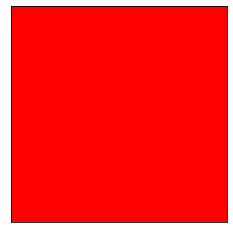

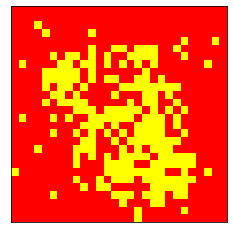

In [1]:
# GENERATION : Phase de test uniquement
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 10
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )

''' greedy layer-wise training '''
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)

id_random = np.random.randint(0,np.shape(train_imgs)[1])
vis_help = train_imgs[id_random,:]
for digit in range(2):
     digit_1hot = np.zeros(shape=(1, 10))
     digit_1hot[0, digit] = 1
     dbn.generate(digit_1hot, name="rbms")



In [ ]:


from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )


''' greedy layer-wise training '''
ITERATIONS = 10
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)
# attention ça prend au moins 30min à s'entrainer !

print("Recognition with the train set")
dbn.recognize_label(train_imgs, train_lbls)
print("Recognition with the test set")
dbn.recognize(test_imgs, test_lbls)

(60000, 784)

Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


100%|██████████| 600/600 [00:00<00:00, 833.83it/s]


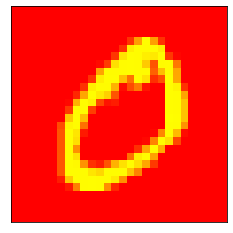

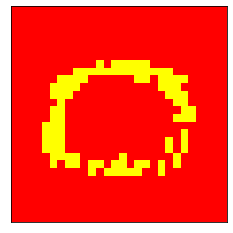

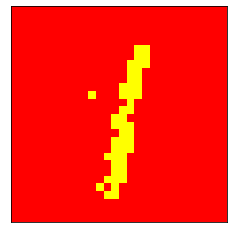

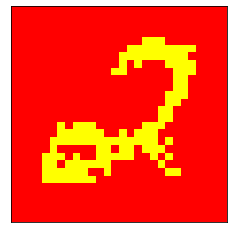

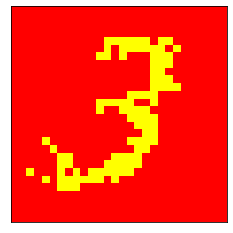

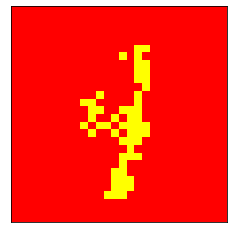

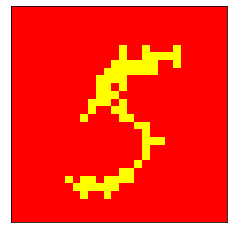

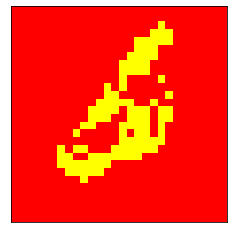

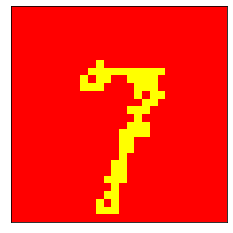

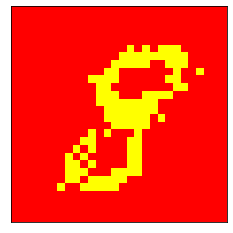

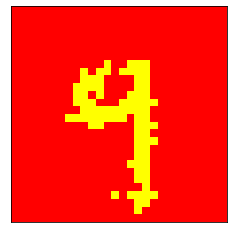

In [2]:


from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet
import os
import glob
import matplotlib.pyplot as plt

# files = glob.glob('trained_rbm/*')
# for f in files:
#     os.remove(f)
#
# files = glob.glob('trained_dbn/*')
# for f in files:
#     os.remove(f)

np.random.seed(21)
ITERATIONS = 25
PLOTTING = True

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print(np.shape(train_imgs))

''' deep-belief net '''

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )


''' greedy layer-wise training '''
ITERATIONS = 10
aux = dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)
# attention ça prend au moins 30min à s'entrainer !

image_0 = train_imgs[1,:]


fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image_0.reshape(image_size), cmap="autumn", vmin=0, vmax=1, animated=True,
                                      interpolation=None)

for digit in range(10):
     digit_1hot = np.zeros(shape=(1, 10))
     digit_1hot[0, digit] = 1
     dbn.generate(digit_1hot, name="rbms", vis_help = image_0, param=True)

In [ ]:
# # TASK 4.3
# ''' fine-tune wake-sleep training '''

# dbn.train_wakesleep_finetune(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=ITERATIONS)

# dbn.recognize(train_imgs, train_lbls)

# dbn.recognize(test_imgs, test_lbls)
# #
# # for digit in range(10):
# #     digit_1hot = np.zeros(shape=(1, 10))
# #     digit_1hot[0, digit] = 1
# #     dbn.generate(digit_1hot, name="dbn")